# Monthly Retail Sales Predictive Model

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np

In [2]:
# importing dataset
sales = pd.read_csv('us_retail_sales.csv')

In [3]:
sales

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0
5,1997,202371,204286,204990,203399,201699,204675,207014.0,207635.0,208326.0,208078.0,208936.0,209363.0
6,1998,209666,209552,210832,213633,214639,216337,214841.0,213636.0,215720.0,219483.0,221134.0,223179.0
7,1999,223997,226250,227417,229037,231235,231903,233948.0,236566.0,237481.0,237553.0,240544.0,245485.0
8,2000,243436,247133,249825,245831,246201,248160,247176.0,247576.0,251837.0,251221.0,250331.0,250658.0
9,2001,252654,252704,250328,254763,255218,254022,252997.0,254560.0,249845.0,267999.0,260514.0,256549.0


In [6]:
# transform dataset
new_df = pd.melt(sales, id_vars = ['YEAR'], var_name = 'Month', value_name = 'sales')

In [7]:
new_df.head()

,YEAR,Month,sales
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [8]:
new_df['DateTime'] = pd.to_datetime(new_df['YEAR'].astype(str) + '-' + new_df['Month'] + '-01', format = '%Y-%b-%d')

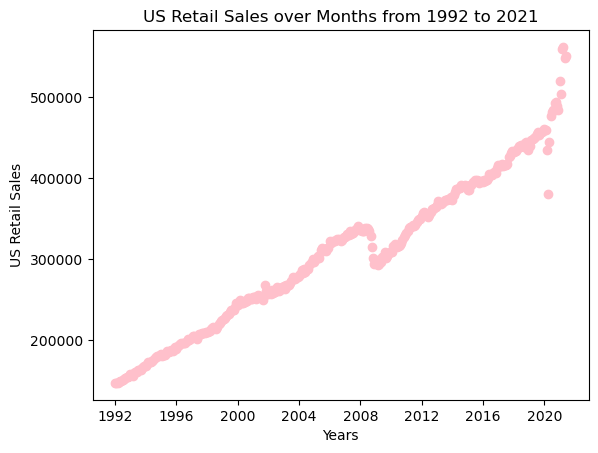

In [22]:
plt.scatter(new_df['DateTime'],new_df['sales'],marker='o',color= 'pink')
plt.title('US Retail Sales over Months from 1992 to 2021')
plt.xlabel('Years')
plt.ylabel('US Retail Sales')

plt.show()

Observations: Over time retail sales have increased, there is a consistent increase from 1992 to 2008 where there is a sudden decrease over the span of 1-2 years. This can be explained by the 2008 economy crash that resulted in many people losing their income therefore sales decreased. After this incident, there is a steady incline once again that eventually the slope increases at a faster rate after 2019. With only a few outliers, the visual demonstrates that retail sales have been on a rise for decades, when the economy falls so do sales. 

Splitting data into a training and test set. Using the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.


In [10]:
from datetime import datetime

In [11]:
tgt_date = datetime.strptime('2020-July-01', '%Y-%B-%d')
print(tgt_date)

2020-07-01 00:00:00


In [12]:
# Split the data into training and test sets
train_data = new_df[new_df['DateTime'] < tgt_date]
test_data = new_df[new_df['DateTime'] >= tgt_date]

In [13]:
test_data = test_data.dropna()
test_data

,YEAR,Month,sales,DateTime
29,2021,JAN,520162.0,2021-01-01
59,2021,FEB,504458.0,2021-02-01
89,2021,MAR,559871.0,2021-03-01
119,2021,APR,562269.0,2021-04-01
149,2021,MAY,548987.0,2021-05-01
179,2021,JUN,550782.0,2021-06-01
208,2020,JUL,481627.0,2020-07-01
238,2020,AUG,483716.0,2020-08-01
268,2020,SEP,493327.0,2020-09-01
298,2020,OCT,493991.0,2020-10-01


In [14]:
test_data.shape

(12, 4)

In [15]:
train_data.shape

(342, 4)

3.) Use the training set to build a predictive model for the monthly retail sales.


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x= train_data.drop('sales', axis=1)
y= train_data['sales']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define model with SARIMAX class with order parameters
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
# fit ARMA model
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23518D+01    |proj g|=  2.56966D-03

At iterate    5    f=  1.23518D+01    |proj g|=  3.21108D-03

At iterate   10    f=  1.23517D+01    |proj g|=  5.87846D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   1.849D-07   1.235D+01
  F =   12.351688017438633     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


4.) Use the model to predict the monthly retail sales on the last year of data.

In [19]:
# Generate predictions
y_pred = ARMAmodel.get_forecast(len(test_data.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_data.index
y_pred_out = y_pred_df["Predictions"] 

/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

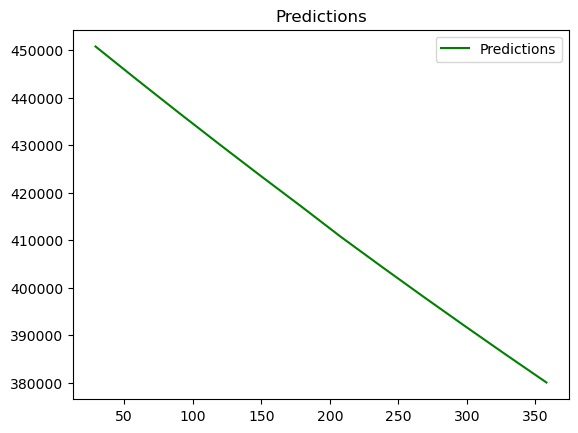

In [23]:
# Plotting Results 
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.title('Predictions')
plt.legend()

5.) Report the RMSE of the model predictions on the test set.

In [21]:
# Evaluate Performance with Root Mean Squared Error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test_data['sales'].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  102808.10290679493
